In [78]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
py.init_notebook_mode(connected=True)

In [79]:
JPM_df = pd.read_csv('JPM.csv')

In [80]:
JPM_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [81]:
JPM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1368 non-null   object 
 1   Open       1368 non-null   float64
 2   High       1368 non-null   float64
 3   Low        1368 non-null   float64
 4   Close      1368 non-null   float64
 5   Adj Close  1368 non-null   float64
 6   Volume     1368 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 74.9+ KB


In [82]:
JPM_df['Daily Return']= JPM_df["Adj Close"].pct_change(1) * 100
JPM_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,7/14/2017,90.809998,92.610001,90.580002,92.250000,79.338943,22235200,NaN
1,7/17/2017,91.820000,91.989998,91.250000,91.389999,78.599312,14374200,-0.932243
2,7/18/2017,90.449997,91.580002,90.320000,91.070000,78.324104,14719400,-0.350140
3,7/19/2017,91.339996,91.620003,91.000000,91.199997,78.435898,11651200,0.142732
4,7/20/2017,91.150002,91.720001,90.900002,91.199997,78.435898,11561700,0.000000


In [83]:
JPM_df["Daily Return"].replace(np.nan , 0 , inplace = True )
JPM_df

C:\Users\gagar\AppData\Local\Temp\ipykernel_17940\1801726485.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,7/14/2017,90.809998,92.610001,90.580002,92.250000,79.338943,22235200,0.000000
1,7/17/2017,91.820000,91.989998,91.250000,91.389999,78.599312,14374200,-0.932243
2,7/18/2017,90.449997,91.580002,90.320000,91.070000,78.324104,14719400,-0.350140
3,7/19/2017,91.339996,91.620003,91.000000,91.199997,78.435898,11651200,0.142732
4,7/20/2017,91.150002,91.720001,90.900002,91.199997,78.435898,11561700,0.000000
...,...,...,...,...,...,...,...,...
1363,12/12/2022,132.399994,134.649994,131.600006,134.210007,134.210007,8841600,1.551152
1364,12/13/2022,136.889999,137.089996,133.080002,134.080002,134.080002,10025400,-0.096867
1365,12/14/2022,133.779999,135.710007,132.759995,133.410004,133.410004,9966100,-0.499700
1366,12/15/2022,131.149994,132.080002,129.050003,130.100006,130.100006,12087800,-2.481072


In [84]:
JPM_df.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1368.00,1368.00,1368.00,1368.00,1368.00,1368.00,1368.00
mean,120.67,121.88,119.46,120.65,112.18,14413609.94,0.05
std,21.82,21.91,21.71,21.81,23.82,6503745.66,1.96
min,81.56,83.75,76.91,79.03,72.58,3220500.00,-14.96
25%,104.73,105.70,103.73,104.76,93.91,10228700.00,-0.83
50%,114.51,115.41,113.44,114.53,102.74,12855450.00,0.00
75%,134.89,136.45,133.94,135.29,128.46,16357600.00,0.96
max,172.71,172.96,170.54,171.78,166.52,54418800.00,18.01


In [85]:
JPM_df['Daily Return']= JPM_df["Adj Close"].pct_change(1) * 100

In [86]:
#function to plot a graph
def plot_financial_graph(df,title):
  fig = px.line(title = title)

  for i in df.columns[1:]:
    fig.add_scatter( x = df['Date'] , y = df[i], name = i )
    fig.update_traces(line_width = 5)
    fig.update_layout({'plot_bgcolor' : 'white'})
  fig.show()





In [87]:
plot_financial_graph(JPM_df.drop(["Volume",'Daily Return'], axis = 1 ), "JPM Financial Data")

In [88]:
plot_financial_graph(JPM_df.iloc[:,[0,6]],"Volume")

In [89]:
plot_financial_graph(JPM_df.iloc[:,[0,7]], "Daily Return")

In [90]:
#Fucntion to classify percentage changes
def pct_return_classifier(percentage_return):
  if percentage_return > -0.3 and percentage_return <= 0.3:
    return 'Insignificant Change'
  elif percentage_return > 0.3 and percentage_return <= 3:
   return 'Positive Change'
  elif percentage_return > -3 and percentage_return <= -0.3:
   return 'Negative Change'
  elif percentage_return > 3 and percentage_return <= 7:
   return 'Large Positive Change'
  elif percentage_return > -7 and percentage_return <= -3:
   return 'Large Negative Change'
  elif percentage_return > 7:
   return 'Bull Run'
  elif percentage_return <= -7:
    return 'Bear Sell Off'



In [91]:
JPM_df['Trend'] = JPM_df['Daily Return'].apply(pct_return_classifier)
trend_summary_df = JPM_df['Trend'].value_counts()
trend_summary_df


Trend
Positive Change          501
Negative Change          495
Insignificant Change     261
Large Positive Change     53
Large Negative Change     44
Bull Run                   7
Bear Sell Off              6
Name: count, dtype: int64

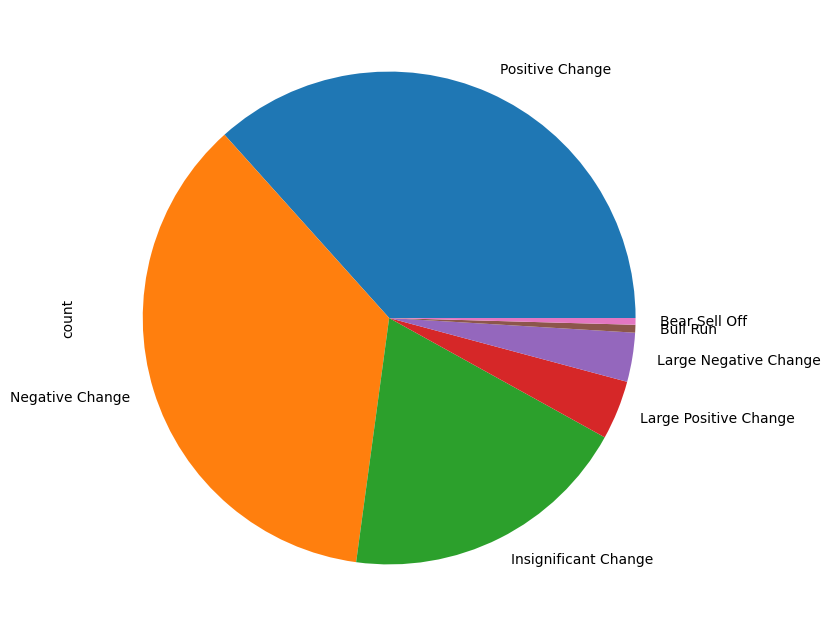

In [92]:
#Make a pie chart
plt.figure(figsize = (8,8))
trend_summary_df.plot( kind = "pie", y = 'Trend');

In [93]:

JPM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1368 non-null   object 
 1   Open          1368 non-null   float64
 2   High          1368 non-null   float64
 3   Low           1368 non-null   float64
 4   Close         1368 non-null   float64
 5   Adj Close     1368 non-null   float64
 6   Volume        1368 non-null   int64  
 7   Daily Return  1367 non-null   float64
 8   Trend         1367 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 96.3+ KB


In [94]:
plot_financial_graph(JPM_df.iloc[:,[0,6]],'Volume')



In [95]:
JPM_df.set_index(['Date'], inplace=True)
JPM_df

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Trend
Date,,,,,,,,
7/14/2017,90.809998,92.610001,90.580002,92.250000,79.338943,22235200,NaN,None
7/17/2017,91.820000,91.989998,91.250000,91.389999,78.599312,14374200,-0.932243,Negative Change
7/18/2017,90.449997,91.580002,90.320000,91.070000,78.324104,14719400,-0.350140,Negative Change
7/19/2017,91.339996,91.620003,91.000000,91.199997,78.435898,11651200,0.142732,Insignificant Change
7/20/2017,91.150002,91.720001,90.900002,91.199997,78.435898,11561700,0.000000,Insignificant Change
...,...,...,...,...,...,...,...,...
12/12/2022,132.399994,134.649994,131.600006,134.210007,134.210007,8841600,1.551152,Positive Change
12/13/2022,136.889999,137.089996,133.080002,134.080002,134.080002,10025400,-0.096867,Insignificant Change
12/14/2022,133.779999,135.710007,132.759995,133.410004,133.410004,9966100,-0.499700,Negative Change


In [ ]:
# Plot Candlestick figure using Cufflinks QuantFig module
cf.go_offline()
figure = cf.QuantFig(JPM_df, title = 'JPM Candlestick Chart', name = 'JPM')
figure.add_sma(periods =[14, 21], column = 'Close', color = ['magenta', 'green' ])
figure.iplot(theme = 'white', up_color = 'green', down_color = 'red')

{
    "_d": {
        "close": "Close",
        "high": "High",
        "low": "Low",
        "open": "Open",
        "volume": "Volume"
    },
    "data": {
        "datalegend": true,
        "kind": "candlestick",
        "name": "JPM",
        "resample": null,
        "slice": [
            null,
            null
        ]
    },
    "kwargs": {},
    "layout": {
        "annotations": {
            "params": {},
            "values": []
        },
        "margin": {
            "b": 30,
            "l": 30,
            "r": 30,
            "t": 30
        },
        "rangeselector": {
            "visible": false
        },
        "rangeslider": false,
        "shapes": {},
        "showlegend": true,
        "title": "JPM Candlestick Chart"
    },
    "panels": {
        "bottom_margin": 0,
        "min_panel_size": 0.15,
        "spacing": 0.08,
        "top_margin": 0.9
    },
    "studies": {
        "sma": {
            "display": {
                "color": [
             